# Data Science Graded Challenge 1
by: Muhammad Farhan Zahirsyah

Batch 10

### Desctription
---
_Pada Graded Challenge ini saya diminta untuk melakukan analisis terhadap dataset pokemon._


### Objective
1. Mengetaui pokemon mana yang memiliki total skor yang terbaik


### Problem Statement
1. Pokemon apa yang memiliki total score diatas rata-rata dan legendary?


## Working Area
---

#### i. Perkenalan

#### ii. Import Library

In [23]:
import pandas as pd
import numpy as np
import scipy
from PIL import Image, ImageFilter
import PIL
import sympy as sy
import matplotlib
import matplotlib.pyplot as plt



%matplotlib inline

In [24]:
print('Pandas Version    :',pd.__version__)
print('Numpy Version     :',np.__version__)
print('Scipy Version     :',scipy.__version__)
print('PIL Version       :',PIL.__version__)
print('sympy Version     :',sy.__version__)
print('matplotlib Version:',matplotlib.__version__)

Pandas Version    : 1.4.1
Numpy Version     : 1.22.3
Scipy Version     : 1.7.3
PIL Version       : 9.0.1
sympy Version     : 1.9
matplotlib Version: 3.5.1


#### iii. Data Loading

In [25]:
img = Image.open('dog_picture.jpg')

In [26]:
print(img.format, img.size, img.mode)

JPEG (780, 438) RGB


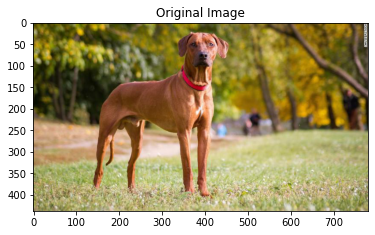

In [27]:
plt.title('Original Image')
plt.rcParams['figure.figsize'] = (10,5)
plt.imshow(img,cmap='gray')
plt.show()

melakukan gaussian blur

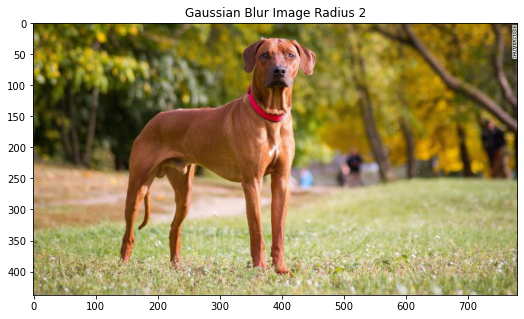

In [28]:
gaus_img = img.filter(ImageFilter.GaussianBlur(radius=0))

plt.title('Gaussian Blur Image Radius 2')
plt.rcParams['figure.figsize'] = (10,5)
plt.imshow(gaus_img,cmap='gray')
plt.show()

In [29]:
gaus_img = np.array(gaus_img)
r = gaus_img[:,:,0]
g = gaus_img[:,:,1]
b = gaus_img[:,:,2]

merubah menjadi gray/ black and white

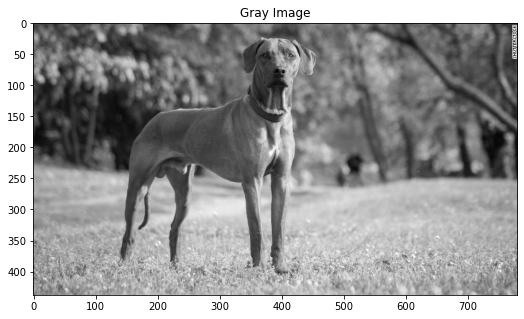

In [30]:
gray = 0.2126*r + 0.7152*g + 0.0722*b
plt.title('Gray Image')
plt.rcParams['figure.figsize'] = (10,5)
plt.imshow(gray,cmap='gray')
plt.show()

hitung vektor gradien

Text(0.5, 1.0, 'dy green')

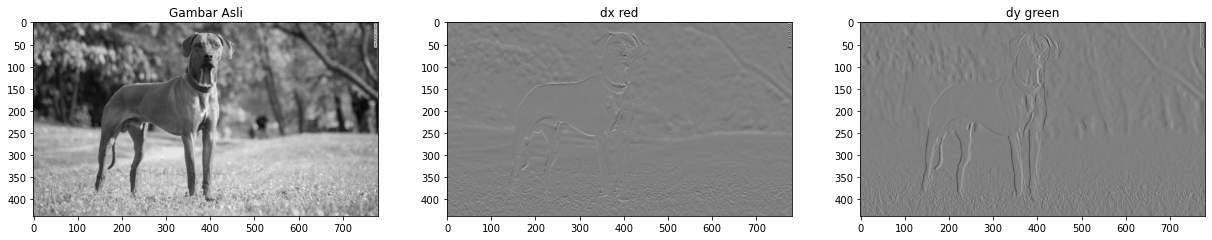

In [31]:
fig, xy = plt.subplots(ncols=3,figsize=(21,5))

dx, dy= np.gradient(gray)



xy[0].imshow(gray,cmap='gray')
xy[0].set_title('Gambar Asli')
xy[1].imshow(dx,cmap='gray')
xy[1].set_title('dx red')
xy[2].imshow(dy,cmap='gray')
xy[2].set_title('dy green')

gradient magnitude

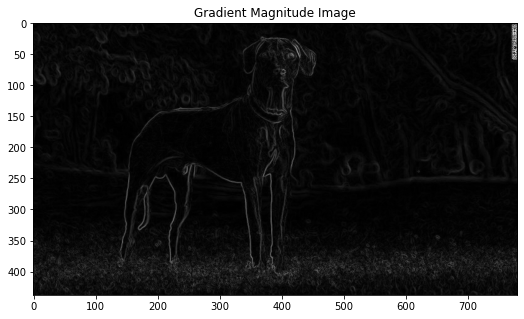

In [32]:
mag = np.sqrt(dx**2 + dy**2)
mag = mag/np.max(mag)*255

plt.title('Gradient Magnitude Image')
plt.rcParams['figure.figsize'] = (15,10)
plt.imshow(mag,cmap='gray')
plt.show()

non maximum suppresion

jika pada arah yang sama ada nilai maksimum maka pada pixel yang diproses dijadikan nilainya 0. artinya dibuat menjadi bukan tepi

In [33]:
gradient_direction = np.arctan2(dy,dx)
gradient_direction = np.rad2deg(gradient_direction)
gradient_direction += 180
gradient_direction

array([[357.29510401,   7.15464254,  19.93498574, ...,  34.89770054,
        196.61206264, 329.42077313],
       [360.        ,   2.42108677,   6.6175589 , ..., 238.52997208,
         78.18599109,  99.21311657],
       [357.67022855, 357.98338508, 355.39609115, ..., 178.43718017,
        336.4577356 , 229.90335669],
       ...,
       [ 82.95036511,  74.97543405,  73.77657566, ..., 215.9400001 ,
        116.57788399, 100.6293412 ],
       [ 83.89016104,  83.82314734,  79.16743119, ..., 185.06897336,
        136.94163068, 114.91863848],
       [ 91.18176247,  90.91920008,  85.52538731, ..., 177.61127642,
        130.62167225, 108.10626584]])

In [34]:
# collecting height and width of magnitude image
image_row, image_col = mag.shape

# creating a blank image of same size as magnitude image
non_max_suppresion = np.zeros(mag.shape)

PI = 180
for row in range(1, image_row - 1):
    for col in range(1, image_col - 1):
        direction = gradient_direction[row, col]
        
        # Angle 0
        if (0 <= direction < PI / 8) or (15 * PI / 8 <= direction <= 2 * PI):
            before_pixel = mag[row, col - 1]
            after_pixel = mag[row, col + 1]

        # Angle 45
        elif (PI / 8 <= direction < 3 * PI / 8) or (9 * PI / 8 <= direction < 11 * PI / 8):
            before_pixel = mag[row + 1, col - 1]
            after_pixel = mag[row - 1, col + 1]

        # Angle 90
        elif (3 * PI / 8 <= direction < 5 * PI / 8) or (11 * PI / 8 <= direction < 13 * PI / 8):
            before_pixel = mag[row - 1, col]
            after_pixel = mag[row + 1, col]

        # Angle 135
        else:
            before_pixel = mag[row - 1, col - 1]
            after_pixel = mag[row + 1, col + 1]

        if mag[row, col] >= before_pixel and mag[row, col] >= after_pixel:
            non_max_suppresion[row, col] = mag[row, col]
        else:
            non_max_suppresion[row, col] = 0


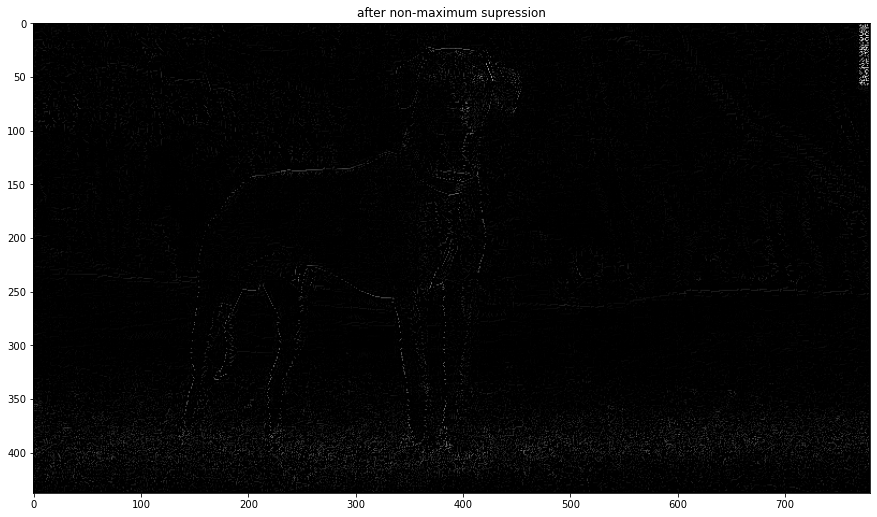

In [35]:
plt.title('after non-maximum supression')
plt.rcParams['figure.figsize'] = (20, 10)
plt.imshow(non_max_suppresion,cmap='gray')
plt.show()

Menentukan treshold

In [36]:
def threshold(image,high,low):
    image_row, image_col = image.shape
    output = np.zeros([image_row,image_col], dtype=np.int32)
    weak = np.int32(150)
    strong = np.int32(255)

    strong_row, strong_col= np.where(image >= high)
    weak_row, weak_col = np.where((image <= high) & (image >= low))
    
    output[strong_row, strong_col] = strong
    output[weak_row, weak_col] = weak

    return output


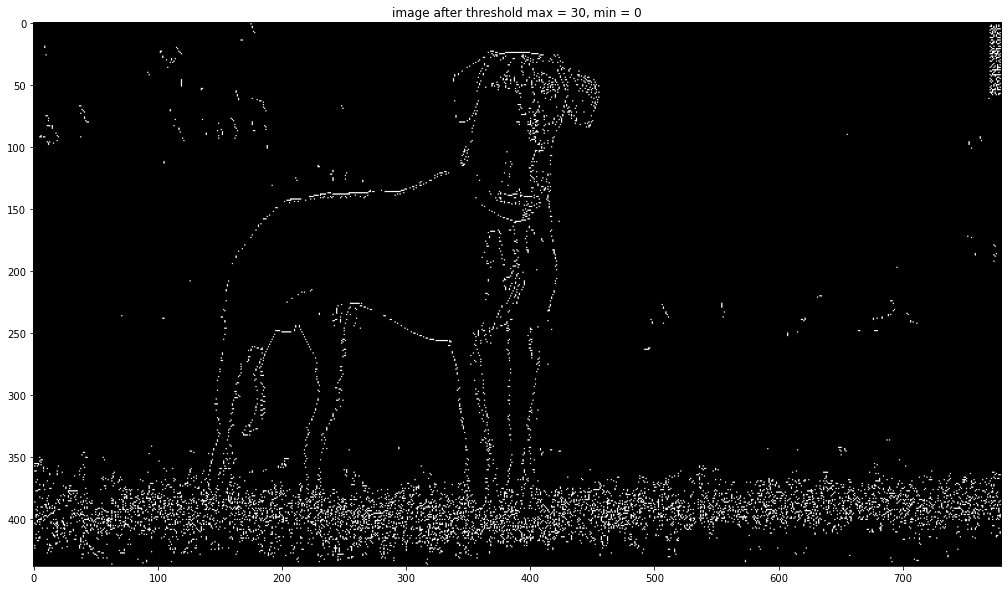

In [37]:
img_threshold1 = threshold(non_max_suppresion,30,0)
plt.title('image after threshold max = 30, min = 0')
plt.rcParams['figure.figsize'] = (20, 10)
plt.imshow(img_threshold1,cmap='gray')
plt.show()

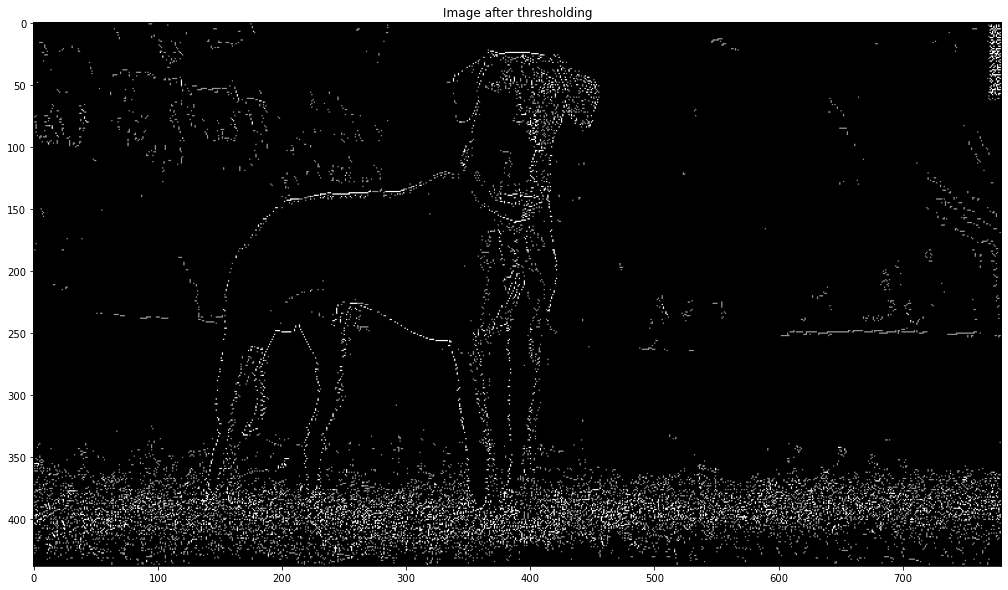

In [38]:
img_threshold2 = threshold(non_max_suppresion,40,20)
plt.title('Image after thresholding')
plt.rcParams['figure.figsize'] = (20, 10)
plt.imshow(img_threshold2,cmap='gray')
plt.show()

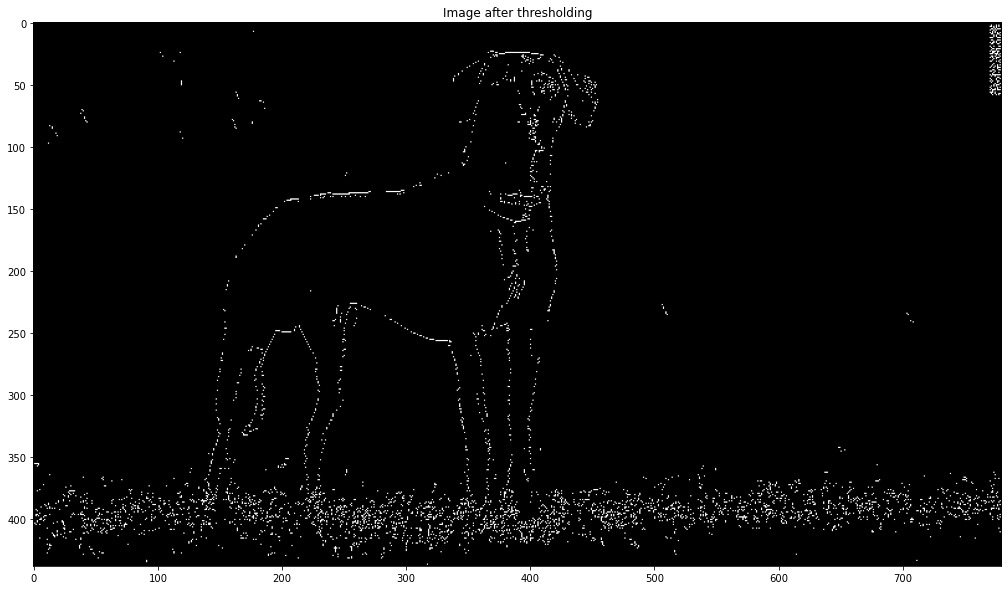

In [39]:
img_threshold3 = threshold(non_max_suppresion,40,00)
plt.title('Image after thresholding')
plt.rcParams['figure.figsize'] = (20, 10)
plt.imshow(img_threshold3,cmap='gray')
plt.show()

Histeresis

In [40]:
def histeresis(img):
    image_row, image_col = img.shape
    output = np.zeros([image_row,image_col], dtype=np.int32)
    strong = np.int32(255)
    weak = np.int32(150)
    for row in range(1, image_row - 1):
        for col in range(1, image_col - 1):
            if img[row, col] == weak:
                if((img[row - 1, col - 1] == strong) or 
                    (img[row - 1, col] == strong) or 
                    (img[row - 1, col + 1] == strong) or 
                    (img[row, col - 1] == strong) or 
                    (img[row, col + 1] == strong) or 
                    (img[row + 1, col - 1] == strong) or 
                    (img[row + 1, col] == strong) or 
                    (img[row + 1, col + 1] == strong)):

                    output[row, col] = strong
                else:
                    output[row,col]=0
    return output

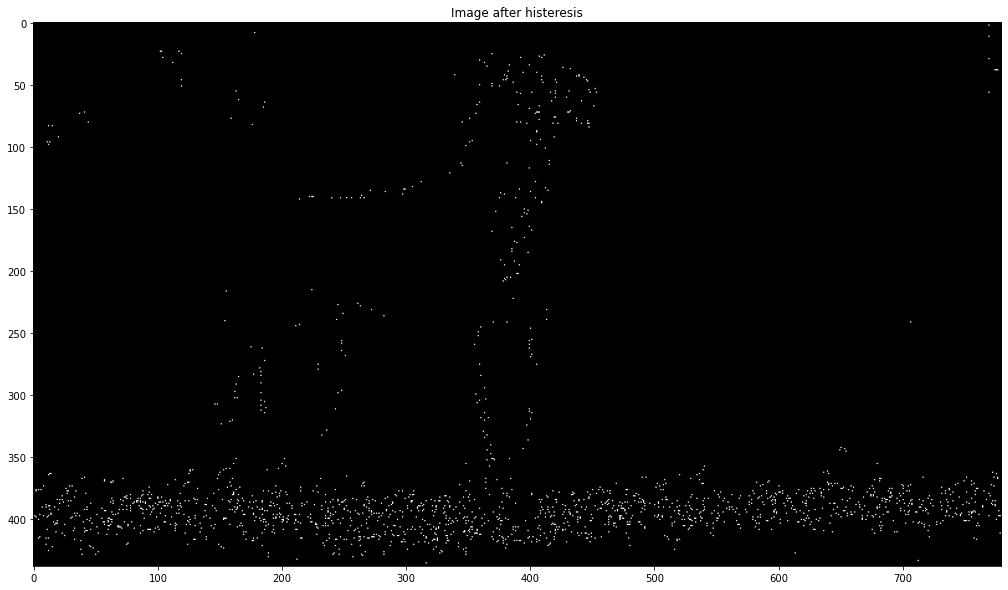

In [41]:
img_histeresis = histeresis(img_threshold2)
plt.title('Image after histeresis')
plt.rcParams['figure.figsize'] = (20, 10)
plt.imshow(img_histeresis,cmap='gray')
plt.show()

#### iv. Data Cleaning

#### v. Data Exploration

#### vi. Summary

## **Terima Kasih**